In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/adity/Downloads/Fraud.csv', encoding = 'latin-1')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df_model = df.copy()
df_model = df_model.drop(['nameOrig', 'nameDest'], axis=1)


le = LabelEncoder()
df_model['type'] = le.fit_transform(df_model['type'])


X = df_model.drop(['isFraud'], axis=1)
y = df_model['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

report, conf_matrix, feature_importance

({'0': {'precision': 0.9997419775064171,
   'recall': 0.9999803289626912,
   'f1-score': 0.9998611390297276,
   'support': 1270904.0},
  '1': {'precision': 0.9810174639331815,
   'recall': 0.7975308641975308,
   'f1-score': 0.8798093292475315,
   'support': 1620.0},
  'accuracy': 0.9997225985521687,
  'macro avg': {'precision': 0.9903797207197993,
   'recall': 0.8987555965801111,
   'f1-score': 0.9398352341386296,
   'support': 1272524.0},
  'weighted avg': {'precision': 0.9997181400683897,
   'recall': 0.9997225985521687,
   'f1-score': 0.9997083058164861,
   'support': 1272524.0}},
 array([[1270879,      25],
        [    328,    1292]], dtype=int64),
 newbalanceDest    0.310346
 oldbalanceOrg     0.285032
 amount            0.160745
 step              0.098032
 oldbalanceDest    0.066391
 type              0.053221
 newbalanceOrig    0.025631
 isFlaggedFraud    0.000602
 dtype: float64)

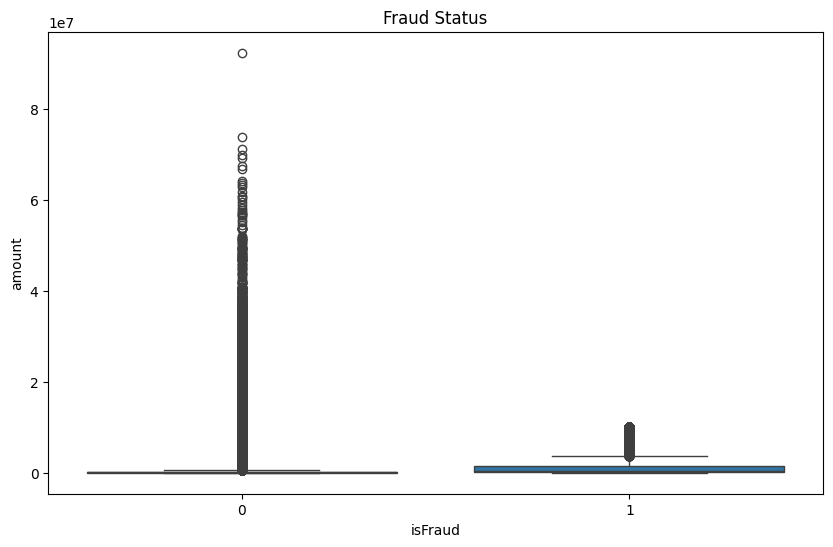

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Fraud Status')
plt.show()

In [9]:
'''Q1)-> no missing values in data,outliers can be fixed via models robustness and ammount and balance shows large Variance
and checked correlations
Q2)->Random Forest classifier is used because it handles non linear data well and is also good for immbalanced data.our goal with it is to
classify transactions on fraudulent and non fraudulent.
Q3)->choosed variables based on data corealtion and feature importance
Q4)->models performance is evaluated using feature importance,f1 score and confusion matrix
Q5)->key factors:
    Transaction Amount
    Old Balance of Sender
    Transaction Type
    New Balance of Sender
    Old Balance of Receiver
Q6)->these factors make sense because they showcase irregularities,large variance and specefic transaction like CASH_OUT
Q7)->real time fraud detection
Q8)->by comparing before and after of fraud rates or false posetives/negatives.'''

'Q1)-> no missing values in data,outliers can be fixed via models robustness and ammount and balance shows large Variance\nand checked correlations\nQ2)->Random Forest classifier is used because it handles non linear data well and is also good for immbalanced data.our goal with it is to\nclassify transactions on fraudulent and non fraudulent.\nQ3)->choosed variables based on data corealtion and feature importance\nQ4)->models performance is evaluated using feature importance,f1 score and confusion matrix\nQ5)->key factors:\n    Transaction Amount\n    Old Balance of Sender\n    Transaction Type\n    New Balance of Sender\n    Old Balance of Receiver\nQ6)->these factors make sense because they showcase irregularities,large variance and specefic transaction like CASH_OUT\nQ7)->real time fraud detection\nQ8)->by comparing before and after of fraud rates or false posetives/negatives.'